In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [4]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [8]:
df['age'] = df['age'].astype(int)

In [9]:
df['age'].dtypes

dtype('int32')

In [16]:
df['owner'].value_counts()

owner
1    29964
2     2564
3      108
4       12
Name: count, dtype: int64

In [14]:
dc = {"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth Owner Or More":4}
df['owner'] = df['owner'].map(dc)

In [19]:
df['brand'].nunique()

23

In [20]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [21]:
dcc = {'TVS':1, 'Royal Enfield':2, 'Triumph':3, 'Yamaha':4, 'Honda':5, 'Hero':6,
       'Bajaj':7, 'Suzuki':8, 'Benelli':9, 'KTM':10, 'Mahindra':11, 'Kawasaki':12,
       'Ducati':13, 'Hyosung':14, 'Harley-Davidson':15, 'Jawa':16, 'BMW':17, 'Indian':18,
       'Rajdoot':19, 'LML':20, 'Yezdi':21, 'MV':22, 'Ideal':23}
dcc

{'TVS': 1,
 'Royal Enfield': 2,
 'Triumph': 3,
 'Yamaha': 4,
 'Honda': 5,
 'Hero': 6,
 'Bajaj': 7,
 'Suzuki': 8,
 'Benelli': 9,
 'KTM': 10,
 'Mahindra': 11,
 'Kawasaki': 12,
 'Ducati': 13,
 'Hyosung': 14,
 'Harley-Davidson': 15,
 'Jawa': 16,
 'BMW': 17,
 'Indian': 18,
 'Rajdoot': 19,
 'LML': 20,
 'Yezdi': 21,
 'MV': 22,
 'Ideal': 23}

In [23]:
df['brand'] = df['brand'].map(dcc)

In [27]:
df = df.drop(['bike_name','city'],axis=1)
df.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3,110.0,1
1,119900.0,11000.0,1,4,350.0,2
2,600000.0,110.0,1,8,675.0,3
3,65000.0,16329.0,1,4,180.0,1
4,80000.0,10000.0,1,3,150.0,4


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='kms_driven'>

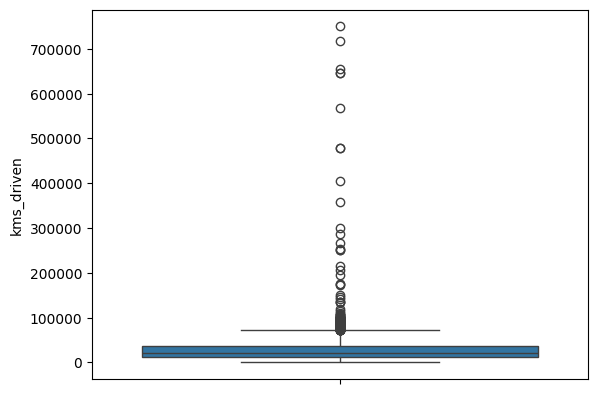

In [49]:
sns.boxplot(df[df['owner']==1]['kms_driven'])

<Axes: xlabel='kms_driven'>

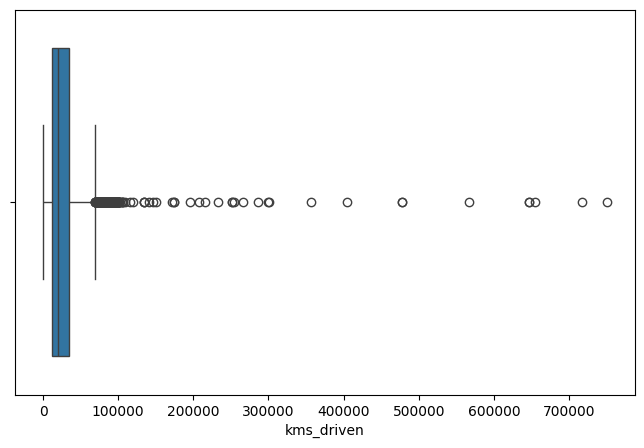

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kms_driven',data=df)

In [43]:
df.dtypes

price         float64
kms_driven    float64
owner           int64
age             int32
power         float64
brand           int64
dtype: object

In [48]:
y = df[['price']]
x = df.drop('price',axis=1)


In [50]:
x.shape,    y.shape

((32648, 5), (32648, 1))

In [59]:
from sklearn.model_selection import train_test_split

In [63]:
x_train , x_test , y_train, y_test  = train_test_split(x,y,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [70]:
x_train

,kms_driven,owner,age,power,brand
31172,41939.0,1,8,200.0,7
26105,20245.0,2,11,220.0,7
6192,44500.0,1,11,125.0,5
14607,8000.0,1,5,220.0,7
9056,24000.0,1,6,110.0,11
...,...,...,...,...,...
8361,3450.0,1,3,750.0,15
11878,3430.0,1,4,750.0,15
13105,48587.0,1,8,150.0,6
30142,27000.0,1,9,150.0,4


In [67]:
lr.fit(x_train,y_train)

LinearRegression()